In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('laptop_data.csv')
df.head(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [4]:
df.drop(columns='Unnamed: 0', inplace=True)

In [5]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [6]:
df['Ram']= df['Ram'].str.replace('GB','')
df['Weight']= df['Weight'].str.replace('kg','')

In [7]:
df['Ram']= df['Ram'].astype('int32')
df['Weight']= df['Weight'].astype('float32')

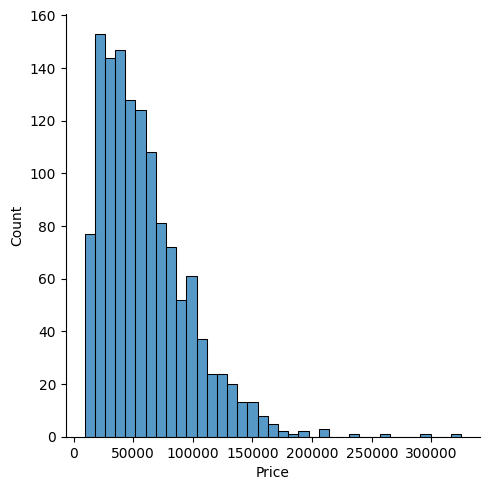

In [8]:
sns.displot(df['Price'])

<Axes: xlabel='Company'>

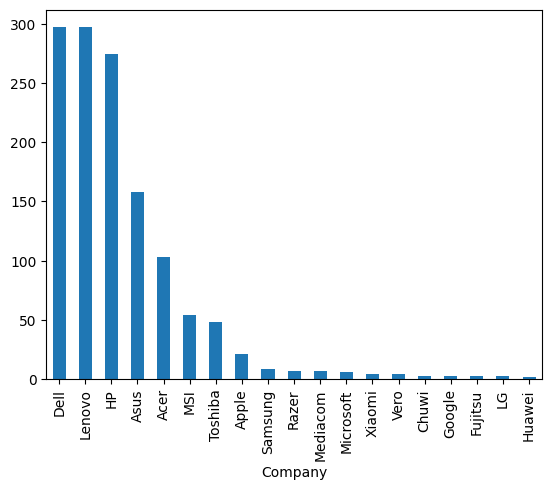

In [9]:
df['Company'].value_counts().plot(kind= 'bar')

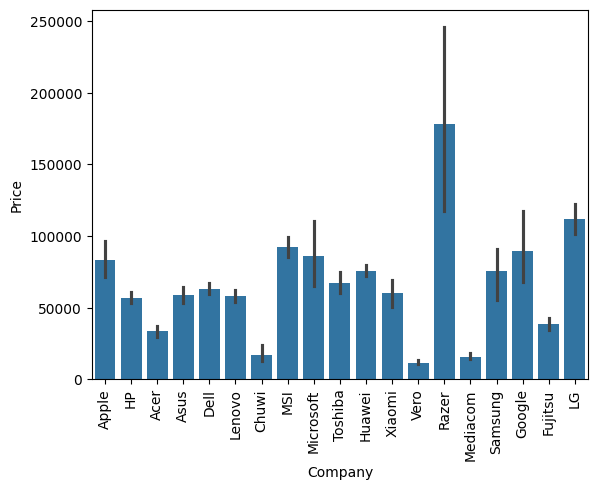

In [10]:
sns.barplot(x= df['Company'], y= df['Price'])
plt.xticks(rotation= 'vertical')
plt.show()

<Axes: xlabel='TypeName'>

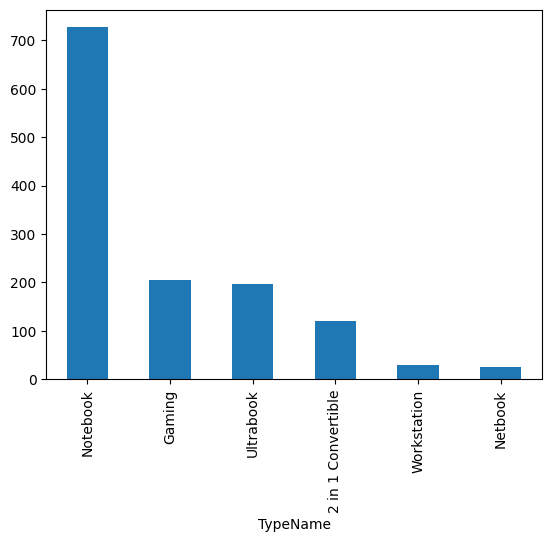

In [11]:
df['TypeName'].value_counts().plot(kind='bar')

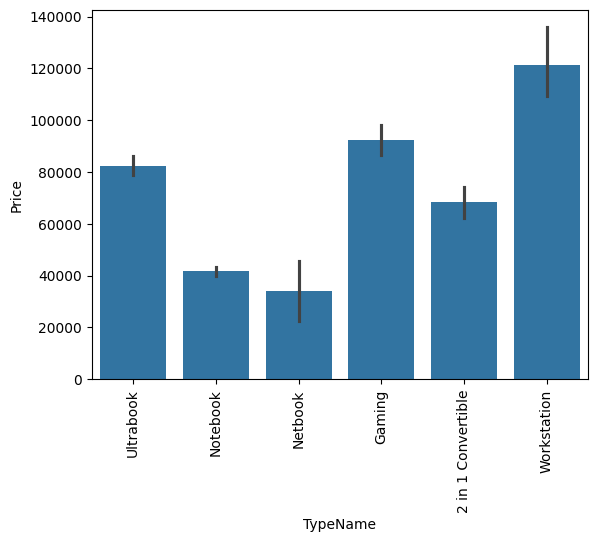

In [12]:
sns.barplot(x= df['TypeName'], y= df['Price'])
plt.xticks(rotation= 'vertical')
plt.show()

<Axes: xlabel='Cpu'>

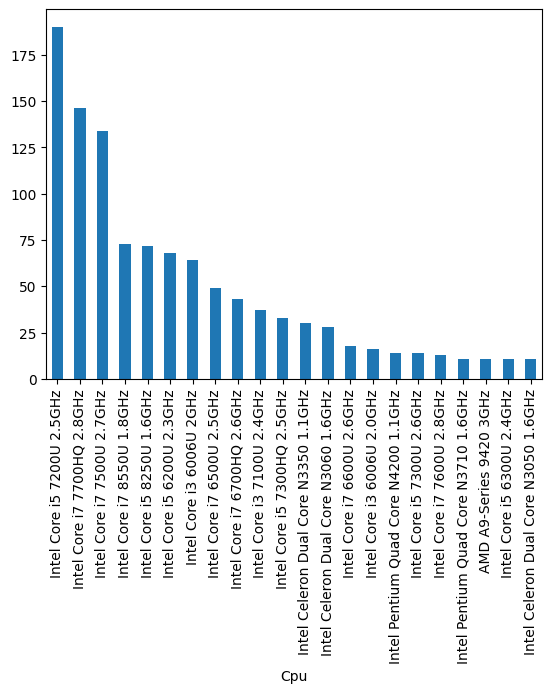

In [13]:
df['Cpu'].value_counts()[df['Cpu'].value_counts() > 10].plot(kind= 'bar')

<Axes: xlabel='Inches', ylabel='Price'>

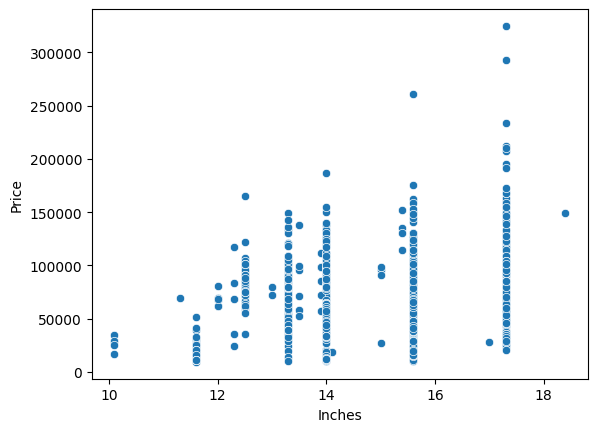

In [14]:
sns.scatterplot(x= df['Inches'], y= df['Price'])

In [15]:
df.head(4)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360


In [16]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [17]:
df['TouchScreen']= df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0 )

In [18]:
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
474,Asus,Notebook,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 6700HQ 2.6GHz,12,128GB SSD + 1TB HDD,Intel HD Graphics 530,Windows 10,2.06,69210.72,0
934,Toshiba,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.47,58874.40,0
168,Acer,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Nvidia GeForce MX150,Windows 10,3.00,45501.12,0


<Axes: xlabel='TouchScreen', ylabel='Price'>

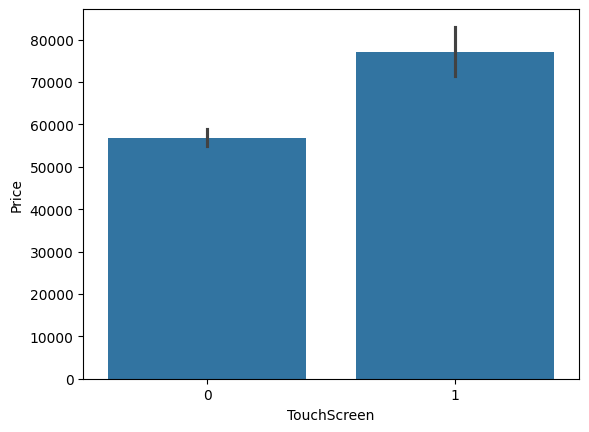

In [19]:
sns.barplot(x= df['TouchScreen'], y= df['Price'])

In [20]:
df['IPS Panel']= df['ScreenResolution'].apply(lambda x:1 if 'IPS Panel' in x else 0)

<Axes: xlabel='IPS Panel', ylabel='Price'>

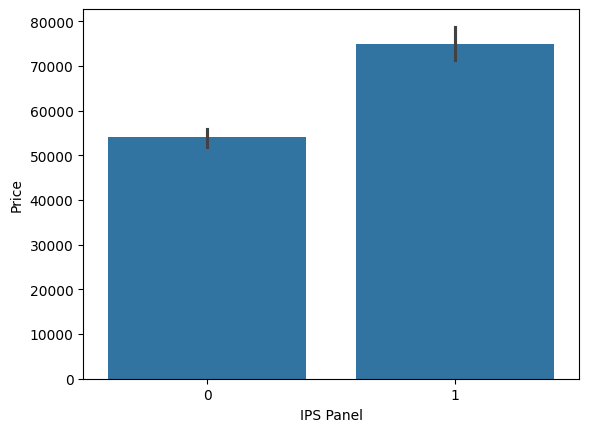

In [21]:
sns.barplot(x= df['IPS Panel'], y= df['Price'])

In [22]:
New= df['ScreenResolution'].str.split('x', n= 1, expand= True)

In [23]:
df['X_res']= New[0]
df['Y_res']= New[1]

In [24]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,X_res,Y_res
532,Asus,Notebook,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7500U 2.7GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.00,69210.7200,0,1,IPS Panel 4K Ultra HD 3840,2160
819,Dell,Notebook,14.0,1366x768,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.76,40226.4000,0,0,1366,768
1032,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.70,63499.1040,0,0,Full HD 1920,1080
1116,Lenovo,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,16,256GB SSD + 1.0TB Hybrid,Nvidia GeForce GTX 980M,Windows 10,4.60,146519.4672,0,1,IPS Panel Full HD 1920,1080
321,Lenovo,Notebook,17.3,1600x900,Intel Core i5 7200U 2.5GHz,4,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.79,31381.9200,0,0,1600,900


In [25]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [26]:
df['X_res']= df['X_res'].astype(int)
df['Y_res']= df['Y_res'].astype(int)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS Panel         1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [28]:
df.corr(numeric_only= True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS Panel      0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [29]:
df['ppi']= (((df['X_res']**2)+ (df['Y_res']**2)**0.5) / df['Inches']).astype('float')

In [30]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,X_res,Y_res,ppi
279,Lenovo,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,2TB HDD,Nvidia GeForce MX150,No OS,2.80,45234.72,0,0,1920,1080,213149.132948
456,Dell,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.7GHz,8,1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.42,109010.88,0,1,1920,1080,213149.132948
1160,Lenovo,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 6600U 2.6GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.70,79866.72,0,0,1920,1080,263391.428571
1125,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.80,88924.32,1,1,1920,1080,263391.428571
976,Lenovo,Notebook,14.0,1366x768,Intel Core i5 6200U 2.3GHz,4,508GB Hybrid,Intel HD Graphics 520,Windows 7,1.70,53386.56,0,0,1366,768,133337.428571


In [31]:
df.drop(columns=['Inches','ScreenResolution', 'X_res', 'Y_res'],inplace=True)

In [32]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [33]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [34]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [35]:
df['Cpu_brand'] = df['Cpu Name'].apply(fetch_processor)

In [36]:
df.sample(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,ppi,Cpu Name,Cpu_brand
259,Lenovo,2 in 1 Convertible,Intel Core i7 7700HQ 2.8GHz,8,512GB SSD,Nvidia GeForce GTX 1050M,Windows 10,2.00,90522.7200,1,1,236376.923077,Intel Core i7,Intel Core i7
537,HP,Notebook,Intel Pentium Quad Core N3710 1.6GHz,4,256GB SSD,Intel HD Graphics 405,Windows 10,1.86,21258.1872,0,0,236376.923077,Intel Pentium Quad,Other Intel Processor
500,Asus,Netbook,Intel Celeron Dual Core N3350 1.1GHz,4,64GB Flash Storage,Intel HD Graphics 500,Windows 10 S,1.20,18115.2000,0,0,160924.482759,Intel Celeron Dual,Other Intel Processor


In [37]:
df

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,ppi,Cpu Name,Cpu_brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,492872.180451,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,155977.443609,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,236376.923077,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,538714.285714,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,492872.180451,Intel Core i5,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,263391.428571,Intel Core i7,Intel Core i7
1299,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,770060.150376,Intel Core i7,Intel Core i7
1300,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,133337.428571,Intel Celeron Dual,Other Intel Processor
1301,HP,Notebook,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,119661.794872,Intel Core i7,Intel Core i7


<Axes: xlabel='Cpu_brand'>

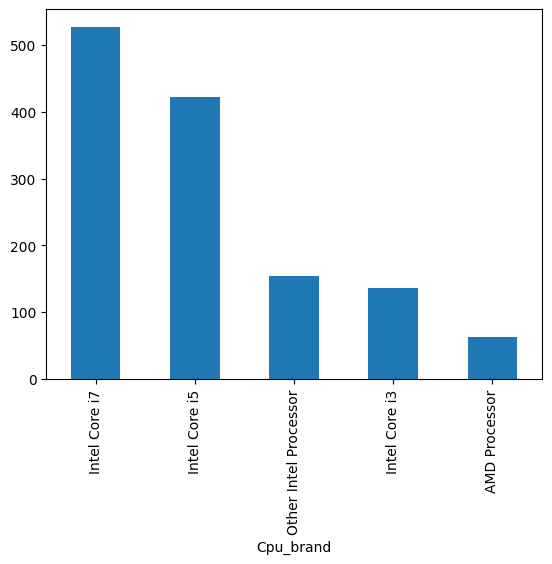

In [38]:
df['Cpu_brand'].value_counts().plot(kind='bar')

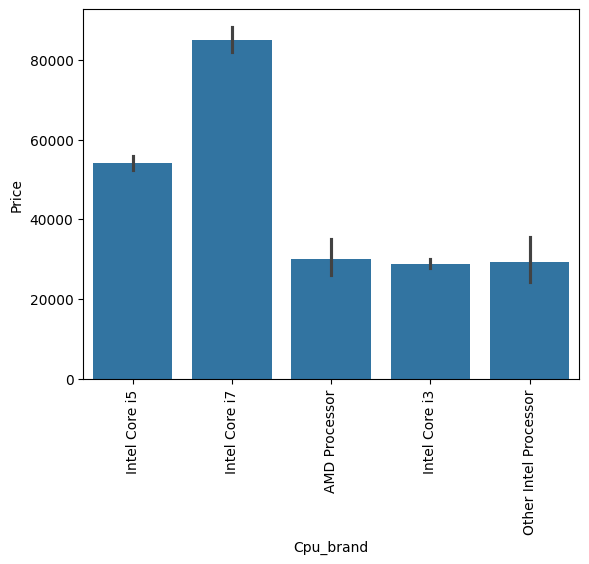

In [39]:
sns.barplot(x= df['Cpu_brand'], y= df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [40]:
df.drop(columns= ['Cpu', 'Cpu Name'])

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,ppi,Cpu_brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,492872.180451,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,155977.443609,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,236376.923077,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,538714.285714,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,492872.180451,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,263391.428571,Intel Core i7
1299,Lenovo,2 in 1 Convertible,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,770060.150376,Intel Core i7
1300,Lenovo,Notebook,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,133337.428571,Other Intel Processor
1301,HP,Notebook,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,119661.794872,Intel Core i7


<Axes: xlabel='Ram'>

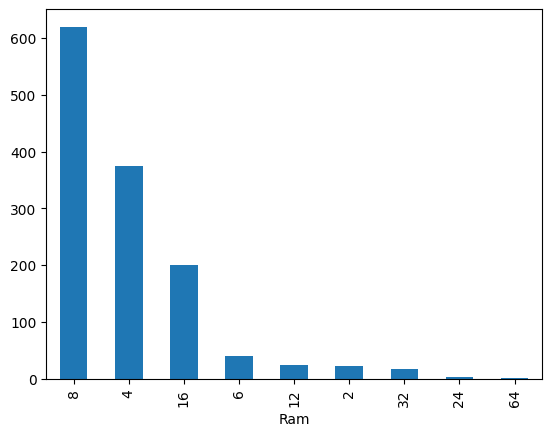

In [41]:
df['Ram'].value_counts().plot(kind='bar')

<Axes: xlabel='Ram', ylabel='Price'>

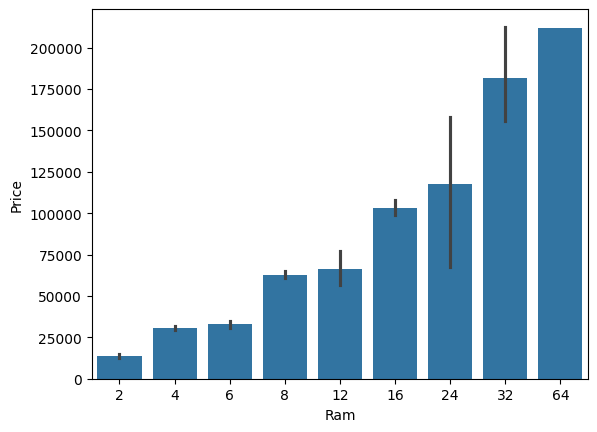

In [42]:
sns.barplot(x= df['Ram'], y= df['Price'])

In [43]:
df['Memory']= df['Memory'].astype(str).replace('\.0', '', regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\suraj\AppData\Local\Temp\ipykernel_13956\2918940970.py:1: SyntaxWarning: invalid escape sequence '\.'
  df['Memory']= df['Memory'].astype(str).replace('\.0', '', regex=True)


In [44]:
df['Memory']

0                 128GB SSD
1       128GB Flash Storage
2                 256GB SSD
3                 512GB SSD
4                 256GB SSD
               ...         
1298              128GB SSD
1299              512GB SSD
1300     64GB Flash Storage
1301                1TB HDD
1302              500GB HDD
Name: Memory, Length: 1303, dtype: object

In [45]:
# Step 1: Clean Memory column
df['Memory'] = df['Memory'].astype(str).replace(r'\.0', '', regex=True)
df['Memory'] = df['Memory'].str.replace('GB', '', regex=False)
df['Memory'] = df['Memory'].str.replace('TB', '000', regex=False)

# Step 2: Split Memory into two parts (before + and after +)
new = df['Memory'].str.split('+', n=1, expand=True)

df['first'] = new[0].str.strip()
df['second'] = new[1].fillna('0').str.strip()

# Step 3: Identify storage types (Layer 1)
df['Layer1HDD'] = df['first'].str.contains('HDD', na=False).astype(int)
df['Layer1SSD'] = df['first'].str.contains('SSD', na=False).astype(int)
df['Layer1Hybrid'] = df['first'].str.contains('Hybrid', na=False).astype(int)
df['Layer1Flash_Storage'] = df['first'].str.contains('Flash Storage', na=False).astype(int)

# Step 4: Identify storage types (Layer 2)
df['Layer2HDD'] = df['second'].str.contains('HDD', na=False).astype(int)
df['Layer2SSD'] = df['second'].str.contains('SSD', na=False).astype(int)
df['Layer2Hybrid'] = df['second'].str.contains('Hybrid', na=False).astype(int)
df['Layer2Flash_Storage'] = df['second'].str.contains('Flash Storage', na=False).astype(int)

# Step 5: Extract numeric values only
df['first'] = df['first'].str.extract(r'(\d+)').fillna(0).astype(int)
df['second'] = df['second'].str.extract(r'(\d+)').fillna(0).astype(int)

# Step 6: Create final storage columns
df['HDD'] = df['first'] * df['Layer1HDD'] + df['second'] * df['Layer2HDD']
df['SSD'] = df['first'] * df['Layer1SSD'] + df['second'] * df['Layer2SSD']
df['Hybrid'] = df['first'] * df['Layer1Hybrid'] + df['second'] * df['Layer2Hybrid']
df['Flash_Storage'] = (
    df['first'] * df['Layer1Flash_Storage'] +
    df['second'] * df['Layer2Flash_Storage']
)

# Step 7: Drop helper columns
df.drop(
    columns=[
        'first', 'second',
        'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash_Storage',
        'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash_Storage'
    ],
    inplace=True
)

In [46]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,ppi,Cpu Name,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage
228,Asus,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD + 500 HDD,Nvidia GeForce GTX 950M,Windows 10,2.69,47472.48,0,0,213149.132948,Intel Core i5,Intel Core i5,500,256,0,0
173,Toshiba,Notebook,Intel Core i3 7100U 2.4GHz,4,500 HDD,Intel HD Graphics 620,Windows 10,2.00,26053.92,0,0,119661.794872,Intel Core i3,Intel Core i3,500,0,0,0
685,Dell,Gaming,Intel Core i7 7820HK 2.9GHz,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1070,Windows 10,3.49,149916.60,0,0,236376.923077,Intel Core i7,Intel Core i7,1000,256,0,0
914,Acer,Notebook,Intel Core i3 7100U 2.4GHz,4,1000 HDD,Intel HD Graphics 620,Windows 10,2.40,26586.72,0,0,236376.923077,Intel Core i3,Intel Core i3,1000,0,0,0
874,Samsung,Ultrabook,Intel Core i7 7500U 2.7GHz,16,256 SSD,Nvidia GeForce 940MX,Windows 10,1.23,98514.72,0,0,245832.000000,Intel Core i7,Intel Core i7,0,256,0,0


In [47]:
df

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,ppi,Cpu Name,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,492872.180451,Intel Core i5,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,155977.443609,Intel Core i5,Intel Core i5,0,0,0,128
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,236376.923077,Intel Core i5,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,538714.285714,Intel Core i7,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,492872.180451,Intel Core i5,Intel Core i5,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,263391.428571,Intel Core i7,Intel Core i7,0,128,0,0
1299,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,770060.150376,Intel Core i7,Intel Core i7,0,512,0,0
1300,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,133337.428571,Intel Celeron Dual,Other Intel Processor,0,0,0,64
1301,HP,Notebook,Intel Core i7 6500U 2.5GHz,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,119661.794872,Intel Core i7,Intel Core i7,1000,0,0,0


In [48]:
df.corr(numeric_only=True)['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
TouchScreen      0.191226
IPS Panel        0.252208
ppi              0.480376
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [49]:
df.drop(columns=['Hybrid','Flash_Storage'], inplace=True)

In [50]:
df.head(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,ppi,Cpu Name,Cpu_brand,HDD,SSD
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,492872.180451,Intel Core i5,Intel Core i5,0,128
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,155977.443609,Intel Core i5,Intel Core i5,0,0
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,236376.923077,Intel Core i5,Intel Core i5,0,256
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,538714.285714,Intel Core i7,Intel Core i7,0,512
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,492872.180451,Intel Core i5,Intel Core i5,0,256


In [51]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [52]:
df['Gpu_Brand']= df['Gpu'].apply(lambda x : x.split()[0] )

In [53]:
df['Gpu_Brand'].value_counts()

Gpu_Brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [54]:
df = df[df['Gpu_Brand'] != 'ARM']

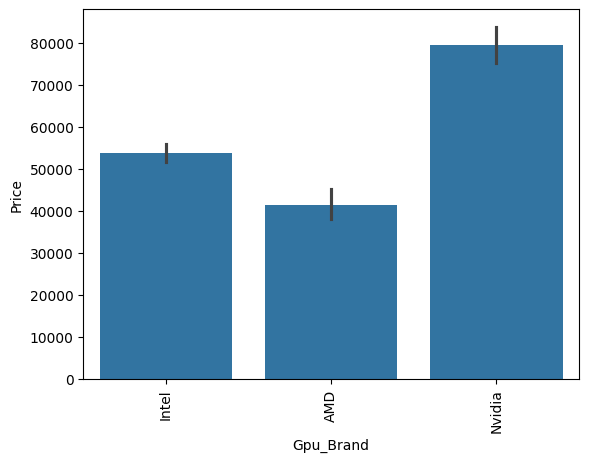

In [55]:
sns.barplot(x= df['Gpu_Brand'], y= df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [56]:
df.columns

Index(['Company', 'TypeName', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price', 'TouchScreen', 'IPS Panel', 'ppi', 'Cpu Name', 'Cpu_brand',
       'HDD', 'SSD', 'Gpu_Brand'],
      dtype='object')

In [57]:
df.drop(columns=['Cpu','Memory','Gpu','Cpu Name'], inplace=True)

C:\Users\suraj\AppData\Local\Temp\ipykernel_13956\300722155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Cpu','Memory','Gpu','Cpu Name'], inplace=True)


In [58]:
df.sample(5)

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS Panel,ppi,Cpu_brand,HDD,SSD,Gpu_Brand
112,Lenovo,2 in 1 Convertible,8,Windows 10,1.370,74538.72,1,1,277254.135338,Intel Core i5,0,256,Intel
1238,MSI,Gaming,8,Windows 10,2.300,62284.32,0,0,236376.923077,Intel Core i7,1000,128,Nvidia
1185,Asus,Gaming,8,Windows 10,2.591,48431.52,0,1,236376.923077,Intel Core i7,1000,256,Nvidia
997,Acer,Notebook,4,Windows 10,2.400,20246.40,0,0,119661.794872,Other Intel Processor,500,0,Intel
1127,HP,Ultrabook,8,Windows 7,1.260,100965.60,0,0,149337.920000,Intel Core i5,0,256,Intel


In [59]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [60]:
def cat(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'No OS/Android/Other'

In [61]:
df['OS']= df['OpSys'].apply(cat)

C:\Users\suraj\AppData\Local\Temp\ipykernel_13956\2826342320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OS']= df['OpSys'].apply(cat)


In [62]:
df['OS'].value_counts()

OS
Windows                1125
No OS/Android/Other     156
Mac                      21
Name: count, dtype: int64

In [63]:
df.drop(columns='OpSys', inplace=True)

C:\Users\suraj\AppData\Local\Temp\ipykernel_13956\27473299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='OpSys', inplace=True)


In [64]:
df.sample(5)

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS Panel,ppi,Cpu_brand,HDD,SSD,Gpu_Brand,OS
976,Lenovo,Notebook,4,1.70,53386.56,0,0,133337.428571,Intel Core i5,0,0,Intel,Windows
870,Lenovo,Notebook,4,2.38,56210.40,0,0,119661.794872,Intel Core i5,500,0,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.72,1,1,770060.150376,Intel Core i7,0,512,Intel,Windows
903,Lenovo,Ultrabook,8,1.13,109170.72,0,1,263391.428571,Intel Core i7,0,0,Intel,Windows
527,Lenovo,Notebook,8,2.20,24455.52,0,0,119661.794872,Intel Core i3,2000,0,Nvidia,No OS/Android/Other


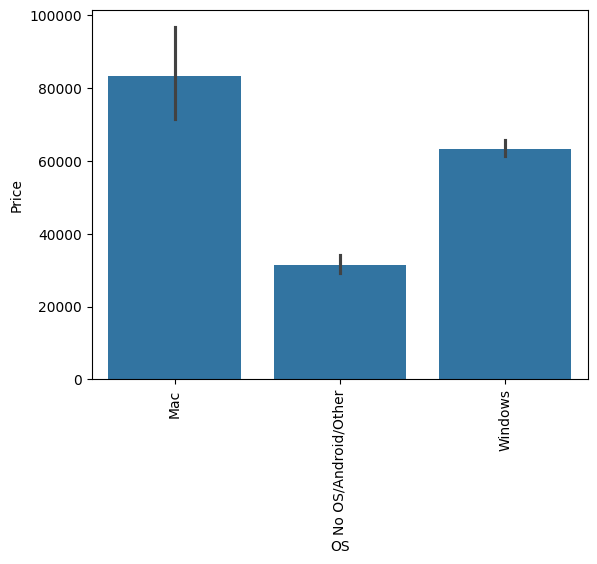

In [65]:
sns.barplot(x= df['OS'], y= df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [66]:
X= df.drop(columns='Price')
y= np.log(df['Price'])

In [67]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

In [69]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [70]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR

In [71]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
    ],
    remainder='passthrough'
)

step2 = LinearRegression()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8022217250409683
MAE 0.21230658533976351


In [76]:
import pickle

pickle.dump(pipe, open('model.pkl','wb'))   # save ONCE

model = pickle.load(open('model.pkl', 'rb'))
prediction = model.predict(df)